Andrea Baretta  
Math 151AH  
Prof. Zhou  
1/28/2024  
Homework 1

1. The exact value of $1 − cos(x)$ when $x = 10^{−3}$ is
$$4.9999995833333472222219742063519620811078710385413014376488... × 10ˆ{-7}$$

1a. Using double precision in your programming language of choice, evaluate $1 − \cos \left(10^{−3}\right)$ and determine the number of significant figures that are accurate.

In [25]:
import numpy as np
double_precision = 1 - np.cos(1e-3)
print(double_precision)

4.999999583255033e-07


Compared to $$4.9999995833333472222219742063519620811078710385413014376488... × 10ˆ{-7}$$ it is accurate only to 4.999999583e-7, or 10 decimal places.

1b. Find a suitable trigonometric identity so that 1 − cos(x) can be accurately computed for |x| ≪ 1.
Your answer should ensure that there is no subtraction of numbers that are close to each other.

$$1-\cos(x)=1-\cos(x) \cdot \frac{1+\cos(x)}{1+\cos(x)}= \frac{\sin^2(x)}{1+\cos(x)}$$

1c. Use your answer from (b) to compute $1 − \cos(10^{−3})$ in double precision. How does it compare
with the result from (a)?

In [26]:
better_precision = (np.sin(1e-3)**2)/(1+np.cos(1e-3))
print(better_precision)

4.999999583333347e-07


Changing the formula to an equivalent form yielded substantially better results. Now, the final result is accurate to 16 decimal places, 6 more than before

2. Let $fl(x)$ denote the floating point approximation of a number, and assume that machine precision $\epsilon = 10^{−β}$ for some positive integer $\beta$.

2a. Consider evaluating the quantity $\sin\left(\frac{\pi}{2} + \delta\right)$ when $0 < \delta ≪ 1$. Use a Taylor expansion to give an estimate for the largest $\delta$ such that  
fl$\left(\sin\left(\frac{\pi}{2}\right)\right) =$ fl$\left(\sin\left(\frac{\pi}{2} + \delta\right)\right)$. (your answer should depend on $\beta$).

Since fl$\left(\sin\left(\frac{\pi}{2} + \delta\right)\right) =$ fl$\left(\cos\left(\delta\right)\right)$, consider the Taylor expansion of the cosine.
$$\cos(\delta) = 1-\frac{\delta^2}{2!}+\frac{\delta^4}{4!}+...$$
We want to ensure that all of the terms following the 1 end up evaluating to 0 in the floating point representation. Since the computer is accurate only to $\beta$ decimal places, we could take $\delta=10^{\beta/2}$, since then $\delta^2=10^{\beta}=\epsilon$. However, since that first term is divided by 2, we can double the size of $\delta$. Then, a reasonable estimate of the largest $\delta$ such that fl$\left(\sin\left(\frac{\pi}{2}\right)\right) =$ fl$\left(\sin\left(\frac{\pi}{2} + \delta\right)\right)$ is $\delta = 2\cdot10^{-\beta/2}$.

2c. Using double precision and your programming language of choice, determine the greatest $\delta$ for
which fl$\left(\sin\left(\frac{\pi}{2}\right)\right) =$ fl$\left(\sin\left(\frac{\pi}{2} + \delta\right)\right)$. (Your answer should be correct to 3 significant figures.)

In [27]:
# Binary search

upper_bound = 1.0
lower_bound = 0.0
n = 1000
for i in range(0, n):
    mid = (upper_bound + lower_bound)/2.0
    if np.sin(np.pi/2 + mid) == 1:
        lower_bound = mid
    else:
        upper_bound = mid
print(lower_bound)
print(np.sin(np.pi/2 + lower_bound))

1.0536712280462266e-08
1.0


Experimentally, increasing n beyond this point does not yield any different results. It is reasonable to believe, then, this algorithm has converged to the best possible value for $\delta$, $1.0536712280462266\cdot10^{-9}$.

3. Consider Newton’s method for finding the root $x^⋆$ of $f(x)$ in the case that $f'(x^⋆) = 0$. Show that the
second-order convergence is lost. In particular, if $t$ is the smallest positive integer such that $f^{(t)}(x^*) \neq 0$, show that Newton’s method converges linearly with constant $1 − 1/t$. (Hint: expand both $f$ and $f'$ in a
Taylor series around $x^⋆$, and ensure both start with a term involving $f^{(t)}(x^⋆)$ as the first nonzero term).

For the first part, we will do a proof by counterexample. Let $f(x) = x^2$, and $x_{n} = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})} = x_{n-1} - \frac{x_{n-1}^2}{2 x_n{-1}} = \frac{1}{2}x_{n-1}$, as per Newton's method. Clearly, $x^* = 0$ is the only fixed point and root of $f(x)$. Then
$$
\begin{aligned}
\lim_{n\to\infty} \frac{|x_n - x^*|}{|x_{n-1}-x^*|^2}
&= \lim_{n\to\infty} \left| \frac{\frac{1}{2}x_{n-1}-x^*}{(x_{n-1}-x^*)^2} \right| \\
&= \lim_{n\to\infty} \frac{1}{2} \left| \frac{x_{n-1} - x^*}{(x_{n-1} - x^*)^2} - \frac{x^*}{(x_{n-1} - x^*)^2} \right| \\
&= \lim_{n\to\infty} \frac{1}{2} \left| \frac{1}{x_{n-1} - x^*} - \frac{x^*}{(x_{n-1}-x^*)^2} \right| \\
&= \frac{1}{2} \left| \frac{1}{0} \right| \lt \infty
\end{aligned}
$$
More broadly, for any $f(x)$, let $t$ be the smallest positive integer such that $f^{(t)}(x^*) \neq 0$. Then
$$
\begin{aligned}
\lim_{n\to\infty} \frac{|x_n - x^*|}{|x_{n-1}-x^*|} &= \lim_{n\to\infty} \left| \frac{x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}-x^*}{x_{n-1}-x^*} \right| \\
&= \lim_{n\to\infty} \left| \frac{x_{n-1}-x^*}{x_{n-1}-x^*} - \frac{\frac{f(x_{n-1})}{f'(x_{n-1})}}{x_{n-1}-x^*} \right| \\
&= \lim_{n\to\infty} \left| 1 - \frac{\frac{f(x_{n-1})}{f'(x_{n-1})}}{x_{n-1}-x^*} \right|\\
&= \lim_{n\to\infty} \left| 1 - \frac{f(x_{n-1})}{f'(x_{n-1})(x_{n-1}-x^*)} \right|
\end{aligned}
$$
Using Taylor expansion around $x^*$, where $f(x^*) = 0$,
$$
\begin{aligned}
f(x_{n-1}) = \sum^t_{i=1}\frac{f^{(i)}(x^*)}{i!}(x_{n-1}-x^*)^i + \frac{f^{(t+1)}(\xi_{n-1})}{(t+1)!}(x_{n-1}-x^*)^{t+1}
\end{aligned}
$$
for some $\xi_{n-1} \in (x^*, x_{n-1})$. Differentiating,
$$
\begin{aligned}
f'(x_{n-1}) &= \sum^t_{i=1}\frac{f^{(i)}(x^*)}{(i-1)!}(x_{n-1}-x^*)^{i-1} + \frac{f^{(t+1)}(\xi_{n-1})}{t!}(x_{n-1}-x^*)^{t} \\
f'(x_{n-1})(x_{n-1}-x^*) &= \sum^t_{i=1}\frac{f^{(i)}(x^*)}{(i-1)!}(x_{n-1}-x^*)^{i} + \frac{f^{(t+1)}(\xi_{n-1})}{t!}(x_{n-1}-x^*)^{t+1}
\end{aligned}
$$
Then
$$
\begin{aligned}
\lim_{n\to\infty} \frac{|x_n - x^*|}{|x_{n-1}-x^*|} &= \lim_{n\to\infty} \left| 1 - \frac{f(x_{n-1})}{f'(x_{n-1})(x_{n-1}-x^*)} \right|\\
&= \lim_{n\to\infty} \left| 1 - \frac{\sum^t_{i=1}\frac{f^{(i)}(x^*)}{i!}(x_{n-1}-x^*)^i + \frac{f^{(t+1)}(\xi_{n-1})}{(t+1)!}(x_{n-1}-x^*)^{t+1}}{\sum^t_{i=1}\frac{f^{(i)}(x^*)}{(i-1)!}(x_{n-1}-x^*)^{i} + \frac{f^{(t+1)}(\xi_{n-1})}{t!}(x_{n-1}-x^*)^{t+1}} \right|
\end{aligned}
$$
Since this is the limit of a rational function, consider only the highest degree term for the limit.
$$
\begin{aligned}
\lim_{n\to\infty} \frac{|x_n - x^*|}{|x_{n-1}-x^*|} &= \lim_{n\to\infty} \left| 1 - \frac{\frac{f^{(t+1)}(\xi_{n-1})}{(t+1)!}(x_{n-1}-x^*)^{t+1}}{\frac{f^{(t+1)}(\xi_{n-1})}{t!}(x_{n-1}-x^*)^{t+1}} \right|\\
&= \left| 1 - \frac{1}{t} \right| \\
&= 1 - \frac{1}{t}
\end{aligned}
$$

4. Implement the following methods for root finding in your language of choice:  
• Fixed point iteration with $g(x) = x − \alpha f(x)$.  
• Newton’s method.  
• The secant method.  
• Steffensen’s method.  
For the secant method, use one iteration of fixed point iteration to generate x1. For each function $f(x)$, plot the points $\{(i, f (xi))\}^{100}_{i=0}$ generated by all four methods on the same axes.  
Run each algorithm for 100 iterations. Use your algorithms to find roots for the following functions:

In [35]:
import numpy as np
def fixed_point(f, a, x0, n):
    ret = np.full(n+1, x0)
    x = x0
    for i in range(0, n):
        x = x - a*f(x)
        ret[i+1] = x
    return ret

def newtons_method(f, dfdx, x0, n):
    ret = np.full(n+1, x0)
    x = x0
    for i in range(0, n):
        x = x - f(x)/dfdx(x)
        ret[i+1] = x
    return ret

def secant_method(f, a, x0, n):
    ret = np.full(n+1, x0)
    x1 = x0
    x2 = x1 - a*f(x1)
    ret[1] = x2
    for i in range(1, n):
        x = x2 - (x2-x1)*f(x2)/(f(x2)-f(x1))
        x1 = x2
        x2 = x
        ret[i+1] = x
        if (x1 == x2) and i+1 != n: # We have converged
            ret[i+2:] = x
            break
    return ret

def steffensens_method(f, x0, n):
    ret = np.full(n+1, x0)
    x = x0
    for i in range(0, n):
        denom = f(x + f(x)) / f(x) - 1
        if denom == 0: # We have converged
            ret[i+1:] = x
            break
        x = x - f(x)/denom
        ret[i+1] = x
    return ret

4a. $f(x) = 10x^2 − 4x − 5$ with $x_0 = −1$, $\alpha = −0.1$

In [36]:
def f(x):
    return 10*(x**2)-4*x-5

def dfdx(x):
    return 20*x-4

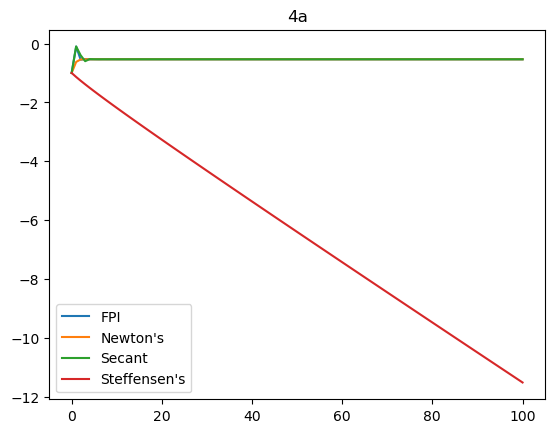

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("4a")
plt.plot(np.arange(0, 101), fixed_point(f, -0.1, -1.0, 100), label="FPI")
plt.plot(np.arange(0, 101), newtons_method(f, dfdx, -1.0, 100), label="Newton's")
plt.plot(np.arange(0, 101), secant_method(f, -0.1, -1.0, 100), label="Secant")
plt.plot(np.arange(0, 101), steffensens_method(f, -1.0, 100), label="Steffensen's")
plt.legend()

4b. $f(x) = x^4 − x^3 − 3x^2 + 5x − 2$ with $x_0 = 1.3$, $\alpha = 0.5$

In [38]:
def f(x):
    return x**4-x**3-3*x**2+5*x-2

def dfdx(x):
    return 4*x**3-3*x**2-6*x+5

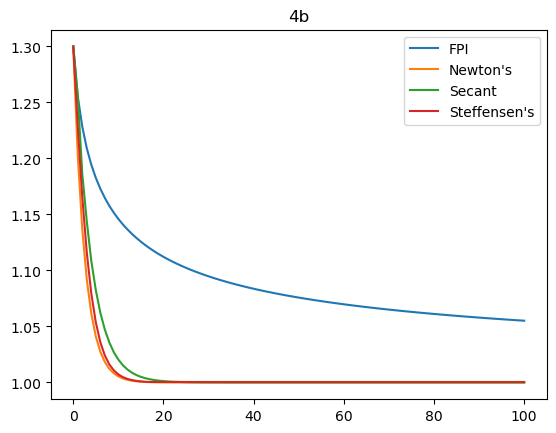

In [39]:
%matplotlib inline

plt.title("4b")
plt.plot(np.arange(0, 101), fixed_point(f, 0.5, 1.3, 100), label="FPI")
plt.plot(np.arange(0, 101), newtons_method(f, dfdx, 1.3, 100), label="Newton's")
plt.plot(np.arange(0, 101), secant_method(f, 0.5, 1.3, 100), label="Secant")
plt.plot(np.arange(0, 101), steffensens_method(f, 1.3, 100), label="Steffensen's")
plt.legend()

5. Consider using fixed point iteration (FPI) $x_{n+1} = \cos(x_n)$ to find the fixed point $x = \cos(x)$. Show that FPI will converge for any $x_0 \in \mathbb{R}$.

Suppose, for some $n\in\mathbb{N}$, $x_n \in [0, \cos(1)]$. Since $\cos'(x) = -\sin(x) < 1$ for $x\in(0, \cos(1))$, $\cos:[0,\cos(1)]\to[-1, 1]$ is strictly decreasing, and so $\cos([0,\cos(1)])\subset[\cos(\cos(1)),1]$. Further, since $\cos(x)$ is continuous on $x\in[0, \cos(1)]$, it is also surjective on $[\cos(\cos(1)), 1]$ by the intermediate value theorem. Therefore, $\cos([0,\cos(1)]) = [\cos(\cos(1)),1]$. Then $\cos(x_n)\in[\cos(1),1]$ (since it is a known fact that $\cos(\cos(1)) \approx 0.8576 > 0.5403 \approx \cos(1)$).  
On the other, consider $x_n \in [\cos(1), 1]$. Similarly to above, $\cos:[\cos(1),1]\to[-1,1]$ is strictly decreasing, and so $\cos([\cos(1),1])\subset[\cos(1),\cos(\cos(1))]$. Since $\cos(x)$ is continuous, by the intermediate value theorem, it is surjective over $[\cos(1),\cos(\cos(1))]$. Then $\cos([\cos(1),1])=[\cos(1),\cos(\cos(1))]\subset[\cos(1),1]$, so $\cos(x_n)\in[\cos(1),1]$.  
Let $x_0 \in \mathbb{R}$. By the properties of the cosine, $x_1 = \cos(x_0) \in [-1, 1]$. Since the cosine is an even function, $x_2 = \cos(\cos(x_0)) \in [0, 1]$. Whether $x_2\in[0,\cos(1)]$ or $x_2\in[\cos(1),1]$, by above, $x_3 = \cos(x_2) \in [\cos(1), 1]$. Inductively, for all $n \geq 3$, $x_n\in[\cos(1),1]$.  
For $x\in[\cos(1),1]$, $\cos'(x) = -\sin(x) \neq 0$. Further, $\max_{x\in[\cos(1),1]} |\cos'(x)| = \max_{x\in[\cos(1),1]} |\sin(x)| = \sin(1) < 1$. Then $\cos:[\cos(1),1]\to[\cos(1),1]$ is a contraction mapping with Lipschitz constant $\sin(1)$, and its derivative is nonzero, any fixed point iteration converges to a fixed point $x^*\in[\cos(1),1]$. Then any sequence $\{x_n\}_{n=3}\subset[\cos(1),1]$ defined by $x_{n+1} = \cos(x_n)$ converges to $x^*$. Therefore, any sequence $\{x_n\}_{n}\subset\mathbb{R}$ defined by $x_{n+1} = \cos(x_n)$ converged to $x^*$.